# Regresión logística

Resumen:
+ Regresión lineal vs regresión logística
+ Las matemáticas detrás de la regresión logística
+ Probabilidades condicionadas
+ Cociente de probabilidades
+ De la regresión lineal a la logística

In [1]:
from IPython.display import Image

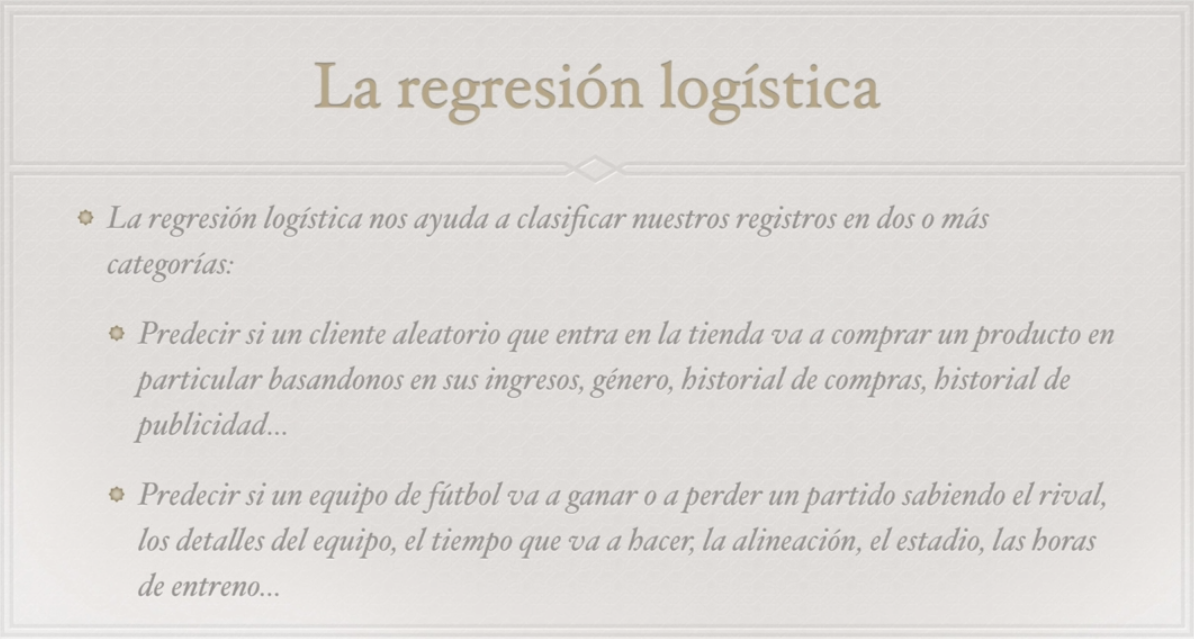

In [2]:
Image(filename="./images/regresion_logistica_01.png")

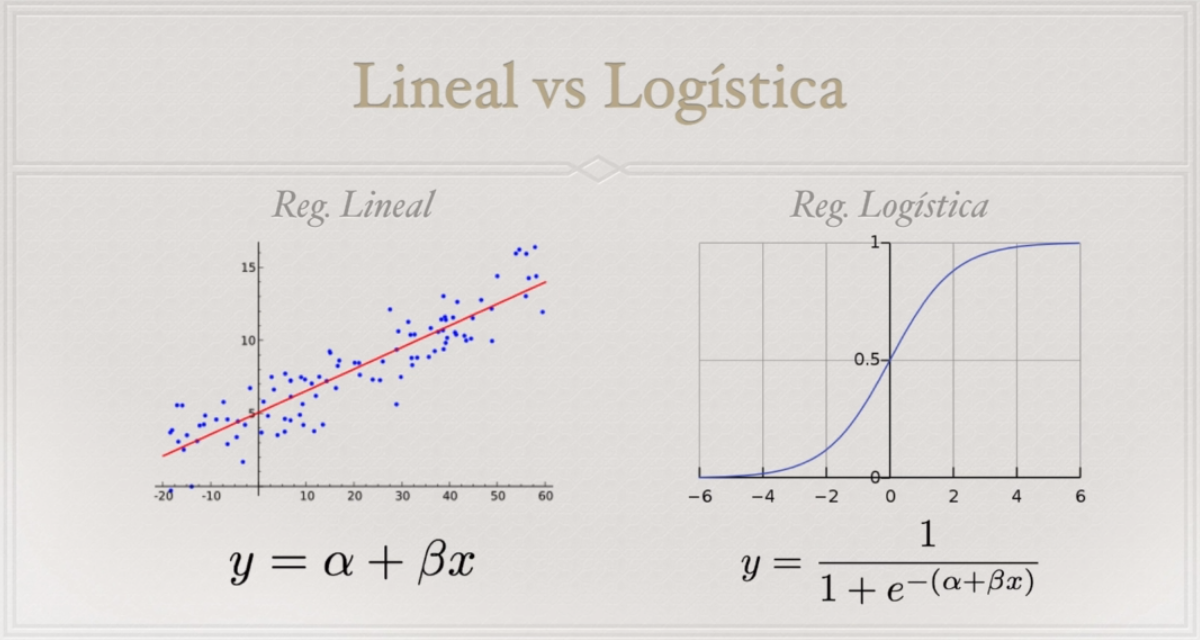

In [3]:
Image(filename="./images/regresion_logistica_02.png")

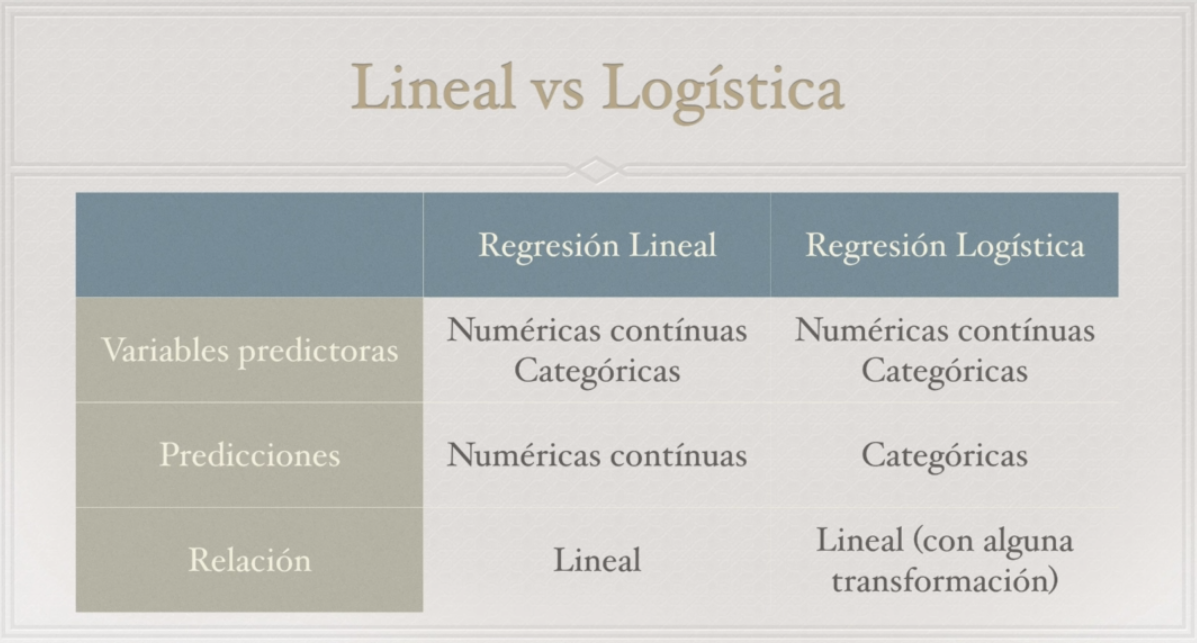

In [4]:
Image(filename="./images/regresion_logistica_03.png")

## Las matemáticas detrás de la regresión logística

### Las tablas de contingencia

In [5]:
import pandas as pd

In [7]:
df = pd.read_csv("./data/gender-purchase/Gender Purchase.csv")
df.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [8]:
df.shape

(511, 2)

In [10]:
contingency_table = pd.crosstab(df["Gender"], df["Purchase"])
contingency_table

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [12]:
# ¿Cuantas personas entraron en la tienda a comprar?
contingency_table.sum(axis=1)

Gender
Female    265
Male      246
dtype: int64

In [13]:
# ¿Cuántas personas compraron y cuántas no?
contingency_table.sum(axis=0)

Purchase
No     231
Yes    280
dtype: int64

In [15]:
# Proporción de hombres/mujeres que compraron
contingency_table.astype("float").div(contingency_table.sum(axis=1), axis = 0)

Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


## La probabilidad condicional

La probabilidad condicionada define la probabilidad de que un cierto suceso sea verdad o no sabiendo ciertas restricciones relacionadas con el evento que ya sabemos que están pasando o no.

In [16]:
from IPython.display import display, Math, Latex

+ ¿Cuál es la probabilidad de que un cliente compre un producto sabiendo que es un hombre?

In [18]:
display(Math(r'P(Purchase|Male) = \frac{Numero\ total\ de\ compras\ hechas\ por\ hombres}{Numero\ total\ de\ hombres\ del\ grupo} = \frac{Purchase\cap Male}{Male}'))
121/246

<IPython.core.display.Math object>

0.491869918699187

+ ¿Cual es la probabilidad de que no compre sabiendo que es hombre?

In [19]:
display(Math(r'P(No\ Purchase|Male) = 1-P(Purchase|Male)'))
125/246

<IPython.core.display.Math object>

0.508130081300813

+ ¿Cuál es la probabilidad de que sabiendo que un cliente compra un producto sea mujer?

In [20]:
display(Math(r'P(Female|Purchase) = \frac{Numero\ total\ de\ compras\ hechas\ por\ mujeres}{Numero\ total\ de\ compras} = \frac{Female\cap Purchase}{Purchase}'))
159/280

<IPython.core.display.Math object>

0.5678571428571428

+ ¿Cuál es la probabilidad de que sabiendo que un cliente compra un producto sea hombre?

In [22]:
display(Math(r'P(Male|Purchase)'))
121/280

<IPython.core.display.Math object>

0.43214285714285716

In [24]:
# Probabilidad de que compre siendo hombre
display(Math(r'P(Purchase|Male)'))
print(121/246)
# Probabilidad de que no compre siendo hombre
display(Math(r'P(NO\ Purchase|Male)'))
print(125/246)
# Probabilidad de que compre siendo mujer
display(Math(r'P(Purchase|Female)'))
print(159/265)
# Probabilidad de que no compre siendo mujer
display(Math(r'P(NO\ Purchase|Female)'))
print(106/265)

<IPython.core.display.Math object>

0.491869918699187


<IPython.core.display.Math object>

0.508130081300813


<IPython.core.display.Math object>

0.6


<IPython.core.display.Math object>

0.4


## Ratio de probabilidades

Cociente entre los casos de éxito sobre los de fracaso en el suceso estudiado y para cada grupo

In [25]:
display(Math(r'P_m = \ probabilidad\ de\ hacer\ compra\ sabiendo\ que\ es \ un \ hombre'))

display(Math(r'P_f = \ probabilidad\ de\ hacer\ compra\ sabiendo\ que\ es \ una\ mujer'))

display(Math(r'odds\in[0,+\infty]'))

display(Math(r'odds_{purchase,male} = \frac{P_m}{1-P_m} = \frac{N_{p,m}}{N_{\bar p, m}}'))

display(Math(r'odds_{purchase,female} = \frac{P_F}{1-P_F} = \frac{N_{p,f}}{N_{\bar p, f}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [26]:
pm = 121/246
pf = 159/265
odds_m = pm/(1-pm)  # 121/125
odds_f = pf/(1-pf)  # 159/106

In [28]:
# Probabilidad de comprar de los hombre y probabilidad de comprar de las mujeres
odds_m, odds_f

(0.9680000000000002, 1.4999999999999998)

+ Si el ratio es superior a 1, es más probable el éxito que el fracaso. Cuanto mayor es el ratio, más probabilidad de éxito en nuestro suceso.
+ Si el ratio es exactamente igual a 1, éxito y fracaso son equiprobables (p=0.5)
+ Si el ratio es menor que 1, el fracaso es más probable que el éxito. Cuanto menor es el ratio, menor es la probabilidad de éxito del suceso.

In [29]:
display(Math(r'odds_{ratio} = \frac{odds_{purchase,male}}{odds_{purchase,female}}'))

<IPython.core.display.Math object>

In [30]:
# Ratio global para determinar qué grupo es más propenso a comprar
odds_r = odds_m/odds_f
odds_r

0.6453333333333335

In [31]:
1/odds_r# odds_f/odds_m

1.5495867768595037

Vemos que son las mujeres las que más compran

## La regresión logística desde la regresión lineal

**En una regresión lineal**

In [33]:
display(Math(r'y = \alpha + \beta \cdot x'))
display(Math(r'(x,y)\in[-\infty, +\infty]^2'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**En una regresión logística**

In [34]:
display(Math(r'Y\in\{0,1\}??'))
display(Math(r'P\in [0,1]'))
display(Math(r'X\in [-\infty,\infty]'))

display(Math(r'P = \alpha + \beta\cdot X'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

P es la probabilidad condicionada de éxito o de fracaso condicionada a la presencia de la variable X

In [35]:
display(Math(r'\frac{P}{1-P} = \alpha + \beta\cdot X\in [0,+\infty]'))

<IPython.core.display.Math object>

In [36]:
display(Math(r' ln(\frac{P}{1-P}) = \alpha + \beta\cdot X'))

<IPython.core.display.Math object>

In [37]:
display(Math(r'\begin{cases}\frac{P}{1-P}\in[0,1]\Rightarrow ln(\frac{P}{1-P})\in[-\infty,0]\\ \frac{P}{1-P}\in[1,+\infty]\Rightarrow ln(\frac{P}{1-P})\in[0, \infty]\end{cases}'))

<IPython.core.display.Math object>

In [38]:
display(Math(r' ln(\frac{P}{1-P}) = \alpha + \beta\cdot X'))
display(Math(r' \frac{P}{1-P} = e^{\alpha + \beta\cdot X}'))
display(Math(r' P = \frac{e^{\alpha+\beta\cdot X}}{1+e^{\alpha+\beta\cdot X}}'))
display(Math(r' P = \frac{1}{1+e^{-(\alpha+\beta\cdot X)}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

+ Si a+bX es muy pequeño (negativo), entonces P tiende a 0
+ Si a+bX = 0, P = 0.5
+ Si a+bX es muy grande (positivo), entonces P tiende a 1

## Regresión logística múltiple

In [39]:
display(Math(r' P = \frac{1}{1+e^{-(\alpha+\sum_{i=1}^n\beta_i\cdot x_i)}}'))

<IPython.core.display.Math object>

In [40]:
display(Math(r' \vec{\beta} = (\beta_1,\beta_2,\cdots,\beta_n)'))
display(Math(r' \vec{X} = (x_1,x_2,\cdots,x_n)'))
display(Math(r' P = \frac{1}{1+e^{-(\alpha+\vec{\beta_i}\cdot \vec{X})}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>